In [86]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, models, utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [87]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [88]:
df = pd.read_csv('archive/CarPrice_Assignment.csv')

In [89]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [90]:
df.drop(['car_ID', 'CarName'], 1, inplace=True)

In [91]:
df.shape

(205, 24)

In [92]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### a quick look tells that doornumber and cylindernumber can be changed to numerical data

In [94]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [95]:
df.loc[:, 'doornumber'] = df.loc[:, 'doornumber'].map({'four':4, 'two':2})

In [96]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [97]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [98]:
df.loc[:, 'cylindernumber'] = df.loc[:, 'cylindernumber'].map({'four':4, 'six':6, 'five':5, 'twelve':12, 'eight':8, 'three':3, 'two':2})

In [99]:
df.head(2)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### exploring each object column

In [101]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [102]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [103]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [104]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [105]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [106]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [107]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

## one hot encoding

In [108]:
catg_cols = df.select_dtypes(include='object')

In [109]:
catg_cols

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,gas,std,convertible,rwd,front,dohc,mpfi
1,gas,std,convertible,rwd,front,dohc,mpfi
2,gas,std,hatchback,rwd,front,ohcv,mpfi
3,gas,std,sedan,fwd,front,ohc,mpfi
4,gas,std,sedan,4wd,front,ohc,mpfi
5,gas,std,sedan,fwd,front,ohc,mpfi
6,gas,std,sedan,fwd,front,ohc,mpfi
7,gas,std,wagon,fwd,front,ohc,mpfi
8,gas,turbo,sedan,fwd,front,ohc,mpfi
9,gas,turbo,hatchback,4wd,front,ohc,mpfi


In [110]:
from sklearn.preprocessing import LabelEncoder     ### way much more elegant than get_dummies <3

le = LabelEncoder()

for col in catg_cols:
    df.loc[:, col] = le.fit_transform(df.loc[:, col])

In [111]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [112]:
df.fuelsystem.value_counts()   
# previously these were strings/ categorical columns                                
                                # mpfi    1bbl
                                # idi     bbl    
                                # spdi    bbl    
                                # spfi    
                                # mfi 

5    94
1    66
3    20
0    11
6     9
2     3
4     1
7     1
Name: fuelsystem, dtype: int64

In [113]:
df.enginetype.value_counts()

3    148
4     15
5     13
0     12
2     12
6      4
1      1
Name: enginetype, dtype: int64

<AxesSubplot:>

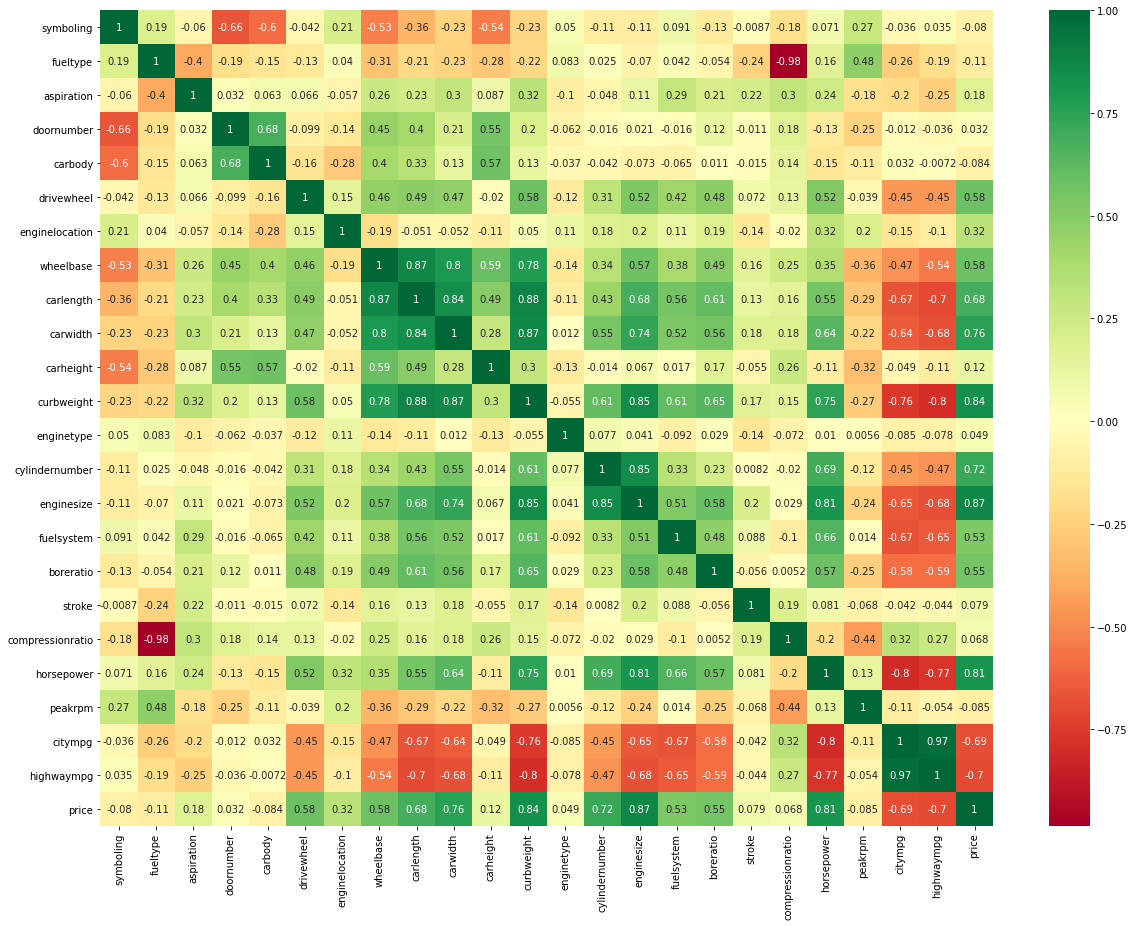

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')

### dropping columns having no correaltion with price

In [115]:
df.drop(['symboling', 'doornumber', 'carbody', 'enginetype', 'stroke', 'compressionratio', 'peakrpm'], 1, inplace=True)

### IMPORTANT - looking for missing values

In [116]:
df.isnull().sum()

fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
price             0
dtype: int64

### splitting data

In [117]:
data = df.drop('price', 1)
targets = df['price']

# 50 percent of 205 = 102
train_data = data.iloc[:102] ############# 0 based so end at 143 @!%$#&^$&!@$
train_targets = targets.iloc[:102]

# 20 percent of 205 = 41
validation_data = data.iloc[102: 143]
validation_targets = targets.iloc[102: 143]

# 30 percent for test
# 205 - 143 = 62
test_data = data.iloc[143:]
test_targets = targets.iloc[143:]

# cross checking
print('Data, Targets', end='\n\n')
print('TRAIN')
print(train_data.shape)
print(train_targets.shape)
print('#'*15)

print('VALIDATION')
print(validation_data.shape)
print(validation_targets.shape)
print('#'*15)

print('TEST')
print(test_data.shape)
print(test_targets.shape)

Data, Targets

TRAIN
(102, 16)
(102,)
###############
VALIDATION
(41, 16)
(41,)
###############
TEST
(62, 16)
(62,)


In [118]:
print(train_data.isnull().sum())
print('-'*25)
print(validation_data.isnull().sum())
print('-'*25)
print(test_data.isnull().sum())
print('-'*25)

fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
dtype: int64
-------------------------
fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
dtype: int64
-------------------------
fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
ci

### Normalization

In [119]:
df.shape

(205, 17)

In [120]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

validation_data-=mean
validation_data /= std

test_data-=mean
test_data /= std

sanity check

In [121]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(102, 16)
(41, 16)
(62, 16)


In [122]:
print(train_data.isnull().sum())
print('-'*25)
print(validation_data.isnull().sum())
print('-'*25)
print(test_data.isnull().sum())
print('-'*25)

fueltype            0
aspiration          0
drivewheel          0
enginelocation    102
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
horsepower          0
citympg             0
highwaympg          0
dtype: int64
-------------------------
fueltype           0
aspiration         0
drivewheel         0
enginelocation    38
wheelbase          0
carlength          0
carwidth           0
carheight          0
curbweight         0
cylindernumber     0
enginesize         0
fuelsystem         0
boreratio          0
horsepower         0
citympg            0
highwaympg         0
dtype: int64
-------------------------
fueltype           0
aspiration         0
drivewheel         0
enginelocation    62
wheelbase          0
carlength          0
carwidth           0
carheight          0
curbweight         0
cylindernumber     0
enginesize         0
fue

#### ^ found the culprint

In [123]:
df.enginelocation.value_counts() # 0 occurs 202 times, 1 occurs 3 time --- Im imputing the nans with 0s

0    202
1      3
Name: enginelocation, dtype: int64

In [124]:
train_data = train_data.fillna(0)

validation_data = validation_data.fillna(0)

test_data = test_data.fillna(0)

In [125]:
print(train_data.isnull().sum())
print('-'*25)
print(validation_data.isnull().sum())
print('-'*25)
print(test_data.isnull().sum())
print('-'*25)

fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
dtype: int64
-------------------------
fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
citympg           0
highwaympg        0
dtype: int64
-------------------------
fueltype          0
aspiration        0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
horsepower        0
ci

In [126]:
print(train_targets.isnull().sum())
print('-'*25)
print(validation_targets.isnull().sum())
print('-'*25)
print(test_targets.isnull().sum())
print('-'*25)

0
-------------------------
0
-------------------------
0
-------------------------


## still nan values in validation

In [127]:
# train_data.drop('enginelocation', 1, inplace=True)
validation_data.drop('enginelocation', 1, inplace=True)
test_data.drop('enginelocation', 1, inplace=True)

In [128]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(102, 16)
(41, 15)
(62, 15)


In [129]:
# BUILDING BASE LINE MODEL
#from keras import layers
#from keras import models

model = models.Sequential()

model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1))

In [130]:
# COMPILING
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [131]:
# FITTING
history = model.fit(train_data, train_targets, epochs=500, batch_size=32, validation_data=(validation_data, validation_targets))

Epoch 1/500
1/4 [======>.......................] - ETA: 1s - loss: 212248704.0000 - mae: 12225.6426

ValueError: in user code:

    /home/hammad/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1233 test_function  *
        return step_function(self, iterator)
    /home/hammad/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/hammad/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/hammad/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/hammad/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/hammad/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1217 run_step  **
        outputs = model.test_step(data)
    /home/hammad/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1183 test_step
        y_pred = self(x, training=False)
    /home/hammad/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/hammad/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 16 but received input with shape (None, 15)


##### new day new problems - never saw nan before

https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network

### Changing Architecture

In [ ]:

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers


model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.l2(0.002)))

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.002)))

model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.002)))

model.add(layers.Dense(1))


# COMPILING
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# FITTING
history = model.fit(train_data, train_targets, epochs=250, batch_size=32, validation_data= (validation_data, validation_targets))

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training mae')
plt.plot(epochs, val_loss, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()